In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
from IPython.display import Markdown


### ML
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from scipy.stats import boxcox

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import RandomOverSampler
# from category_encoders import BinaryEncoder

from sklearn.model_selection import cross_val_score
import joblib
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import LabelBinarizer
from math import floor


palette = ["#c7522a","#008585", "#fbf2c4", "#003f5c", "#58508d", "#ffa600" , "#660e60","#6c584c"]
plt.style.use(style='custom_matplotlibrc.mplstyle')
sns.set_theme(context='notebook', style='darkgrid', palette=palette, font='Comic Sans MS', font_scale=1.5, color_codes=True)

warnings.filterwarnings("ignore")
%matplotlib inline

Bad value in file 'custom_matplotlibrc.mplstyle', line 8 ("grid.linestyle: '--'"): Key grid.linestyle: linestyle '--' is not a valid on-off ink sequence.
Bad value in file 'custom_matplotlibrc.mplstyle', line 26 ('axes.facecolor: #FAFAD2'): Key axes.facecolor: '' does not look like a color arg
Bad value in file 'custom_matplotlibrc.mplstyle', line 27 ('axes.labelcolor: #FAFAD2'): Key axes.labelcolor: '' does not look like a color arg


In [4]:

def doughnuts(data):
    # Create a pieplot
    plt.pie(x=data.values, labels=data.index,
            autopct='%.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    # plt.legend(loc='upper right')
    # add a circle at the center to transform it in a donut chart
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)

    return p

In [5]:
df = pd.read_csv(r"zomato.csv")

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


++++++++++++++++++++++++++++++++++++++++++++++
rate==>15.03 | phone==>2.34 | location==>0.04 | rest_type==>0.44 | dish_liked==>54.29 | cuisines==>0.09 | approx_cost(for two people)==>0.67 | 
++++++++++++++++++++++++++++++++++++++++++++++


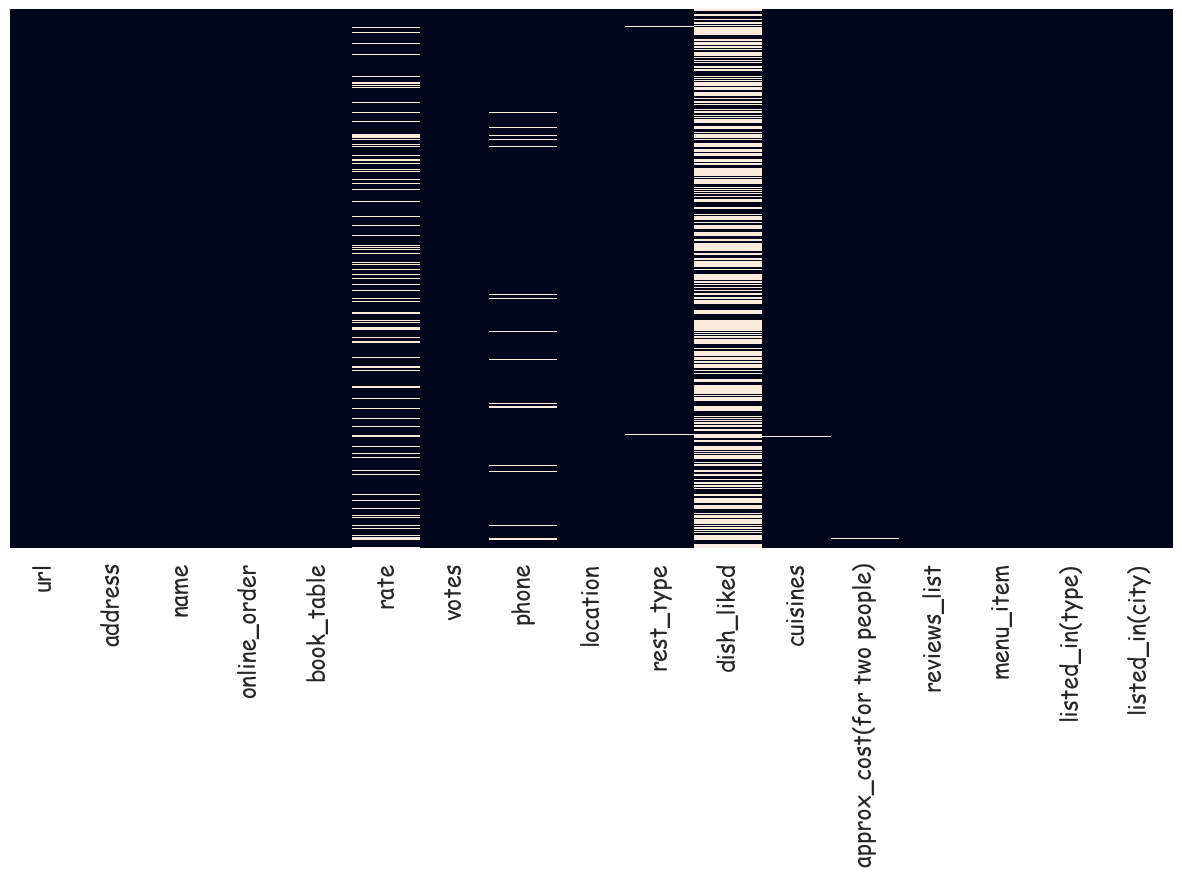

In [10]:
def null_percent(col):
    percentage = round(col.isnull().sum()/len(col)*100, 2)
    if percentage > 0:
        print(f'{col.name}==>{percentage} |', end=' ')


print('+'*46)
df.apply(null_percent)
print()
print('+'*46)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [11]:
df.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

## EDA

## Numerical Features

> votes

In [12]:
df["votes"].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

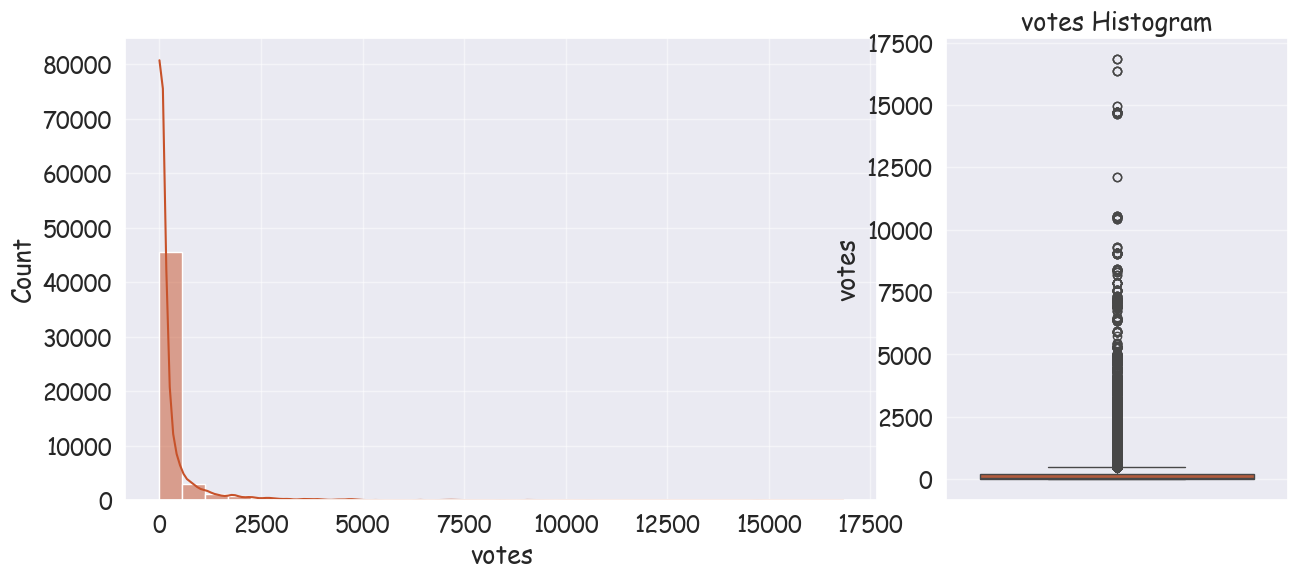

In [13]:

fig, ax = plt.subplot_mosaic([['hist', 'hist', 'box']])
sns.histplot(data=df, x='votes', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['votes'], ax=ax['box'])
plt.title('votes Histogram')
plt.show()

In [14]:
df.loc[df["votes"] == 0, "votes"].count()

10027

In [15]:
df.loc[df['votes'] == 0, 'rate']

72       NEW
75       NEW
84       NaN
90       NaN
91       NaN
        ... 
51644    NaN
51675    NaN
51710    NaN
51713    NaN
51714    NaN
Name: rate, Length: 10027, dtype: object

## Categorical Features

> online_order

In [16]:
df["online_order"].describe()

count     51717
unique        2
top         Yes
freq      30444
Name: online_order, dtype: object

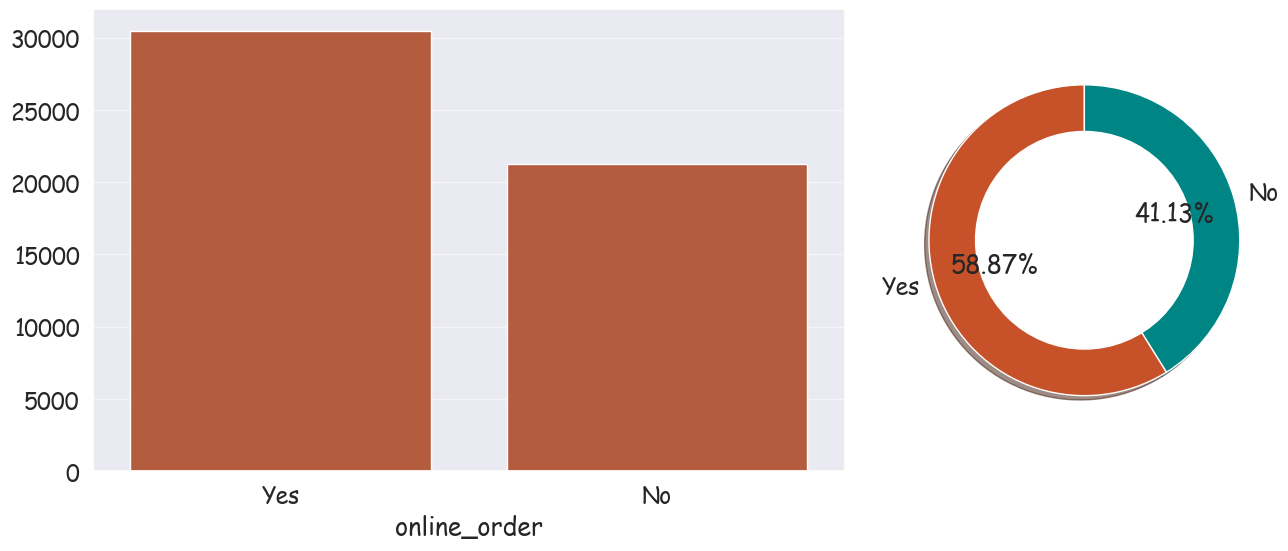

In [17]:

fig, ax = plt.subplot_mosaic([['hist', 'hist', 'doughnut']])
g = df['online_order'].value_counts()
sns.barplot(x=g.index, y=g.values, ax=ax['hist'])
ax['doughnut'] = doughnuts(g)
plt.show()

> book_table

In [18]:
df["book_table"].describe()

count     51717
unique        2
top          No
freq      45268
Name: book_table, dtype: object

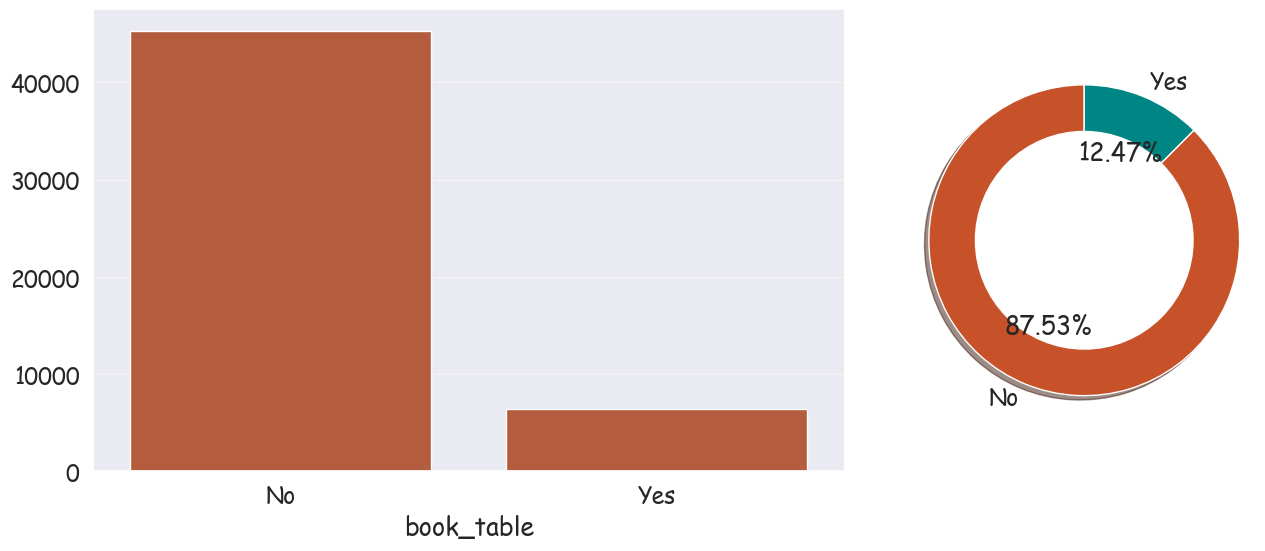

In [19]:

fig, ax = plt.subplot_mosaic([['hist', 'hist', 'doughnut']])
g = df['book_table'].value_counts()
sns.barplot(x=g.index, y=g.values, ax=ax['hist'])
ax['doughnut'] = doughnuts(g)
plt.show()

> listed_in(type)

In [20]:
df["listed_in(type)"].describe()

count        51717
unique           7
top       Delivery
freq         25942
Name: listed_in(type), dtype: object

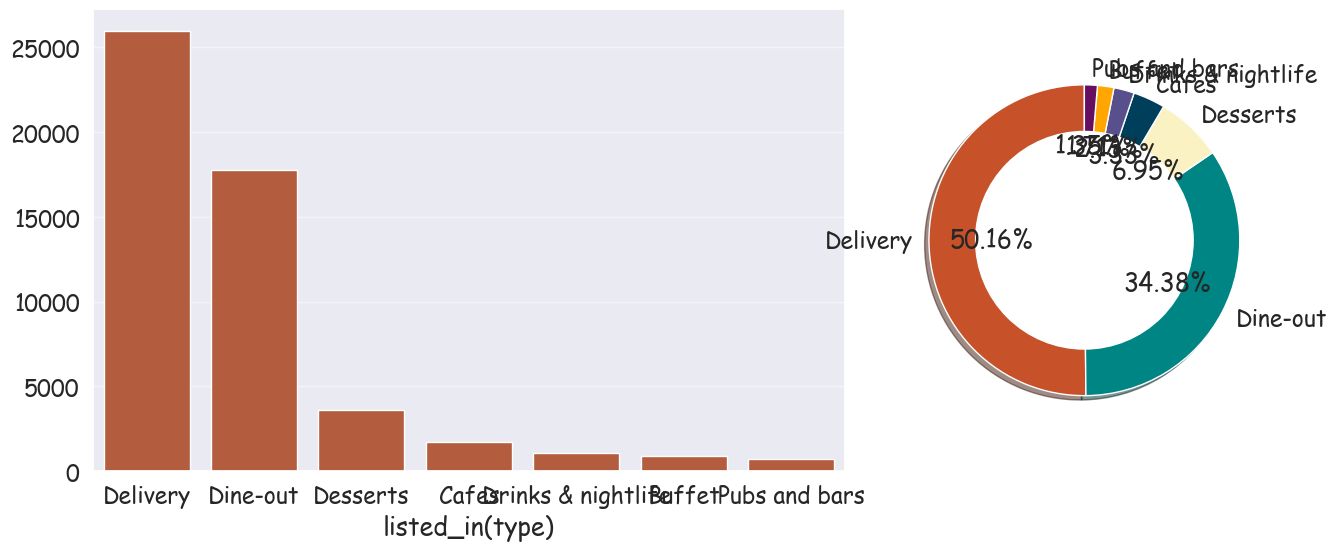

In [21]:

fig, ax = plt.subplot_mosaic([['hist', 'hist', 'doughnut']])
g = df['listed_in(type)'].value_counts()
sns.barplot(x=g.index, y=g.values, ax=ax['hist'])
ax['doughnut'] = doughnuts(g)
plt.show()

In [22]:
df.rename({'listed_in(type)': 'type'}, axis=1, inplace=True)

> listed_in(city)

In [23]:
df["listed_in(city)"].describe()

count     51717
unique       30
top         BTM
freq       3279
Name: listed_in(city), dtype: object

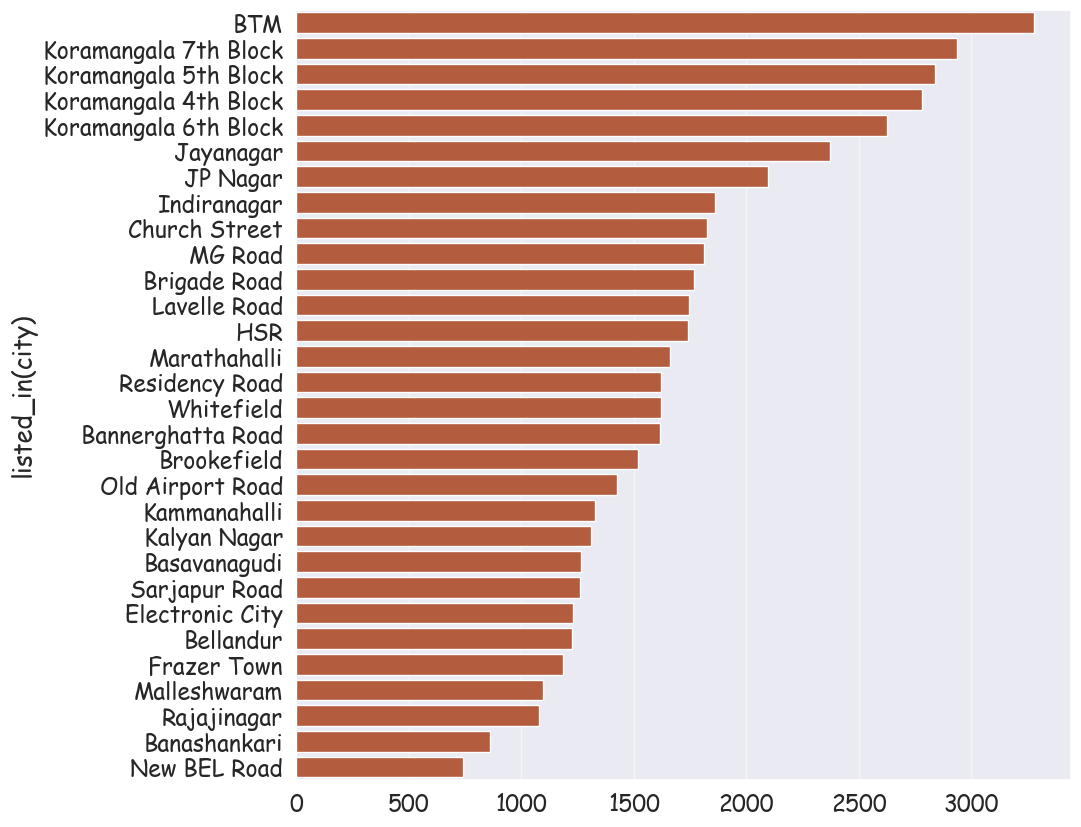

In [24]:
fig = plt.figure(figsize=(10, 10))
g = df['listed_in(city)'].value_counts()
sns.barplot(y=g.index, x=g.values, color= palette[0])
plt.show()

In [25]:
df.rename({'listed_in(city)': 'city'}, axis=1, inplace=True)


## Features With Errors

> name

In [26]:
df["name"].describe()

count               51717
unique               8792
top       Cafe Coffee Day
freq                   96
Name: name, dtype: object

In [27]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

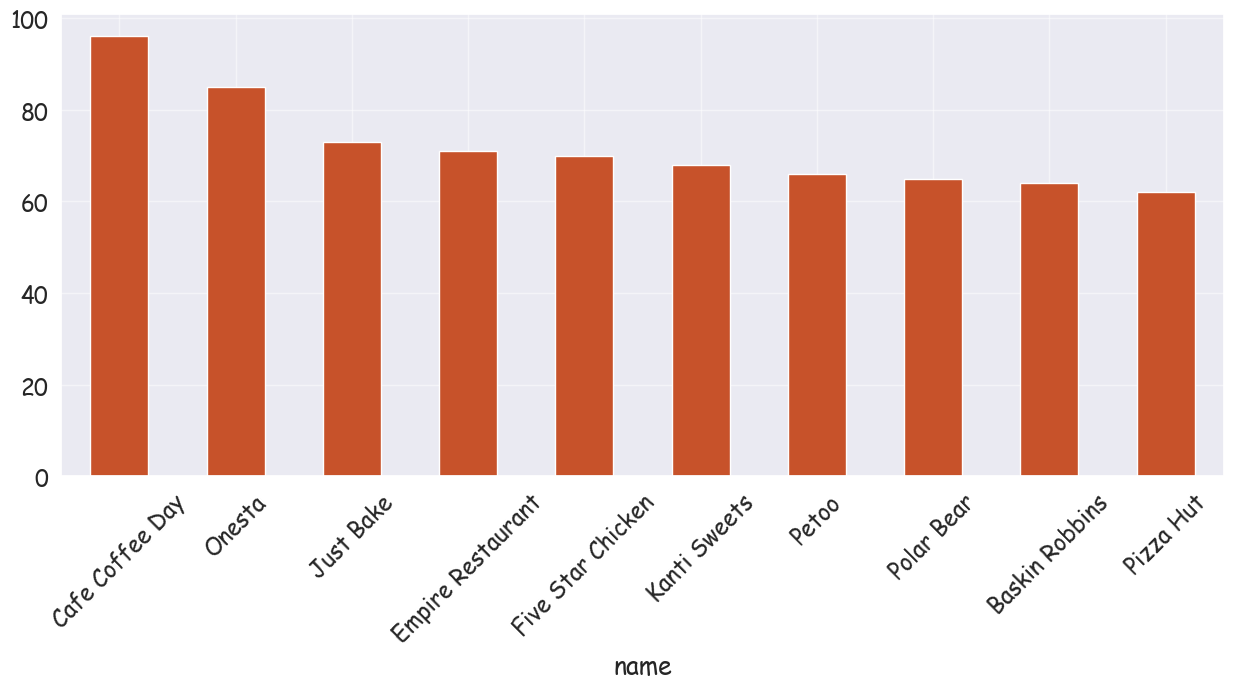

In [28]:
df['name'].value_counts().head(10).plot(kind='bar', rot=45);

> rate

In [29]:
df["rate"].describe()

count     43942
unique       64
top         NEW
freq       2208
Name: rate, dtype: object

In [30]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
def rate_transformer(rate):
    try:
        return float(rate.split('/')[0])
    except:
        return np.nan



df['rate'] = df['rate'].apply(rate_transformer)
df['rate'] = df['rate'].astype(float)


In [32]:
# replace ( NEW and - ) values with null value
df["rate"].replace({"NEW": np.nan, "-": np.nan}, inplace=True) 

In [33]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

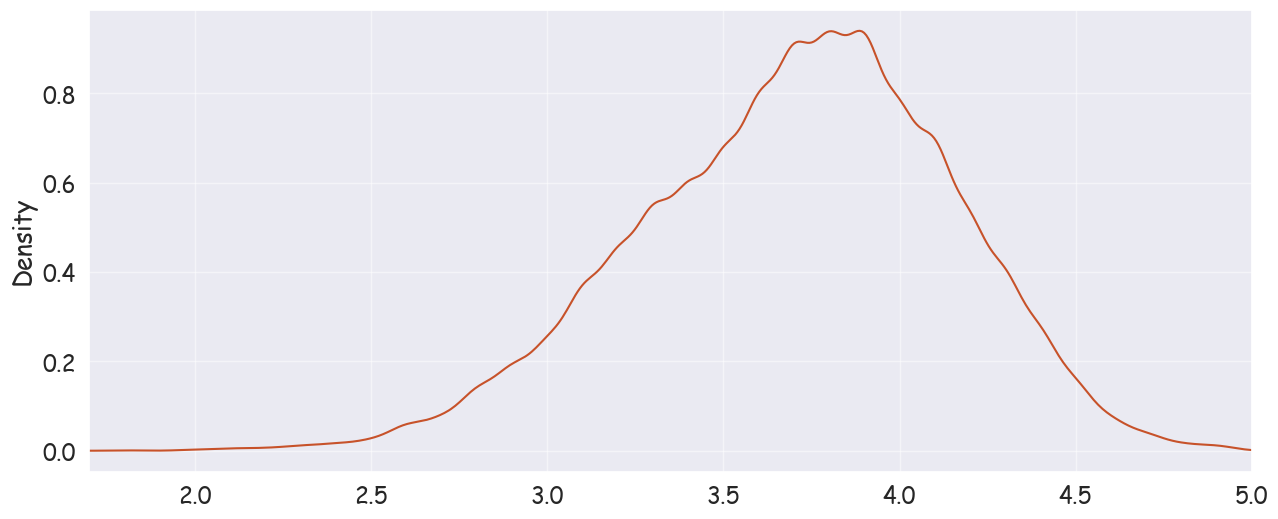

In [34]:
df['rate'].plot.kde(xlim=(df['rate'].min()-.1, df['rate'].max()+.1));

> location

In [35]:
df["location"].describe()

count     51696
unique       93
top         BTM
freq       5124
Name: location, dtype: object

In [36]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [37]:
### replace locations with value count lower than 1000 with other 
g = df['location'].value_counts() 
idx = g[g  < 200].index.to_list()
df['location'].replace(idx,'others',inplace=True)

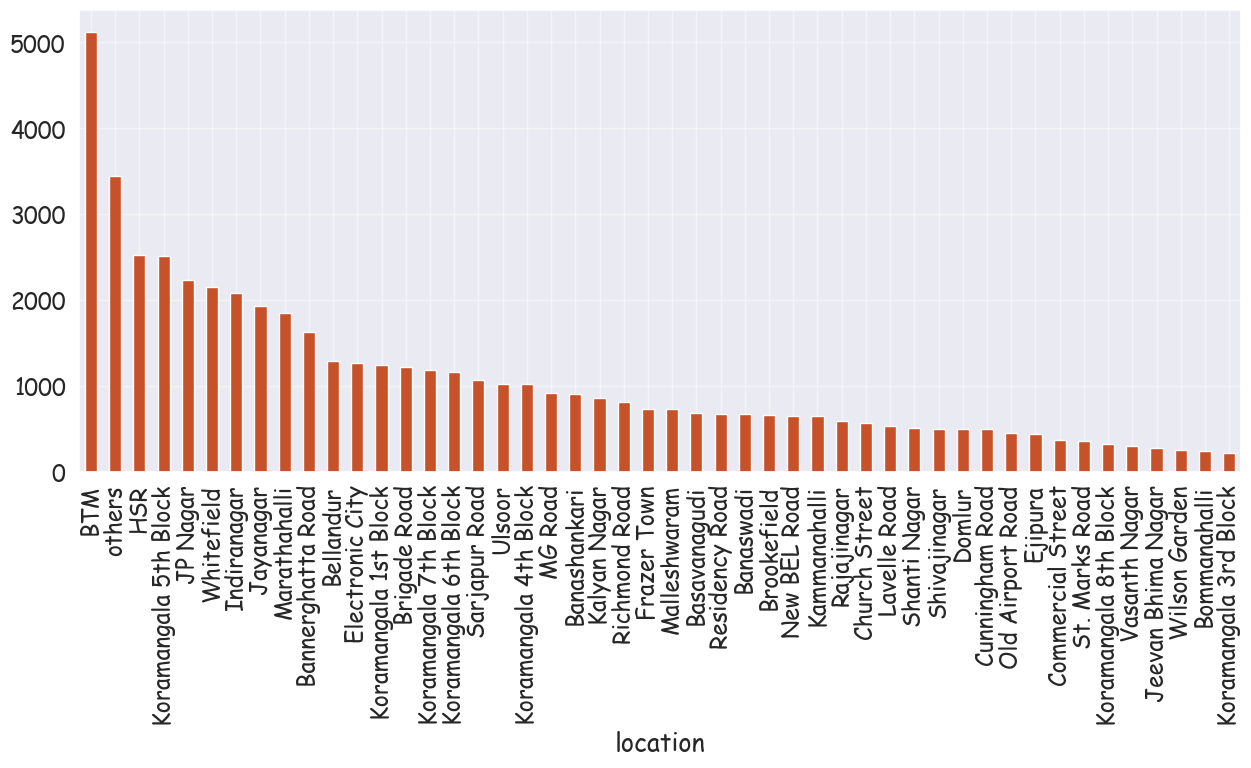

In [38]:
df['location'].value_counts().plot(kind='bar');

In [39]:
df['location'].describe()

count     51696
unique       48
top         BTM
freq       5124
Name: location, dtype: object

#### >> rest_type

In [40]:
df["rest_type"].describe()

count           51490
unique             93
top       Quick Bites
freq            19132
Name: rest_type, dtype: object

In [41]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [42]:
g = df['rest_type'].value_counts()
idx = g[g < 500].index.to_list()
df['rest_type'].replace(idx,'other',inplace=True)

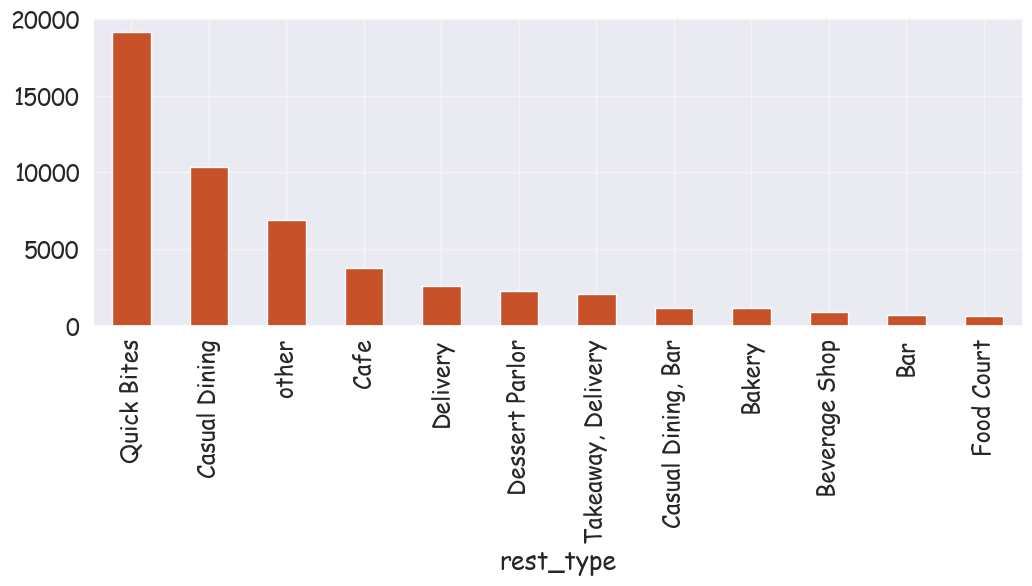

In [43]:
df['rest_type'].value_counts().plot(kind='bar',figsize=(12,4));

In [44]:
df['rest_type'].describe()

count           51490
unique             12
top       Quick Bites
freq            19132
Name: rest_type, dtype: object

#### >> cuisines

In [45]:
df["cuisines"].describe()

count            51672
unique            2723
top       North Indian
freq              2913
Name: cuisines, dtype: object

In [46]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [47]:
g = df['cuisines'].value_counts()
idx = g[g < 50].index.to_list()
df['cuisines'].replace(idx, 'other', inplace=True)

In [48]:
s = df['cuisines'].value_counts().index.to_list()

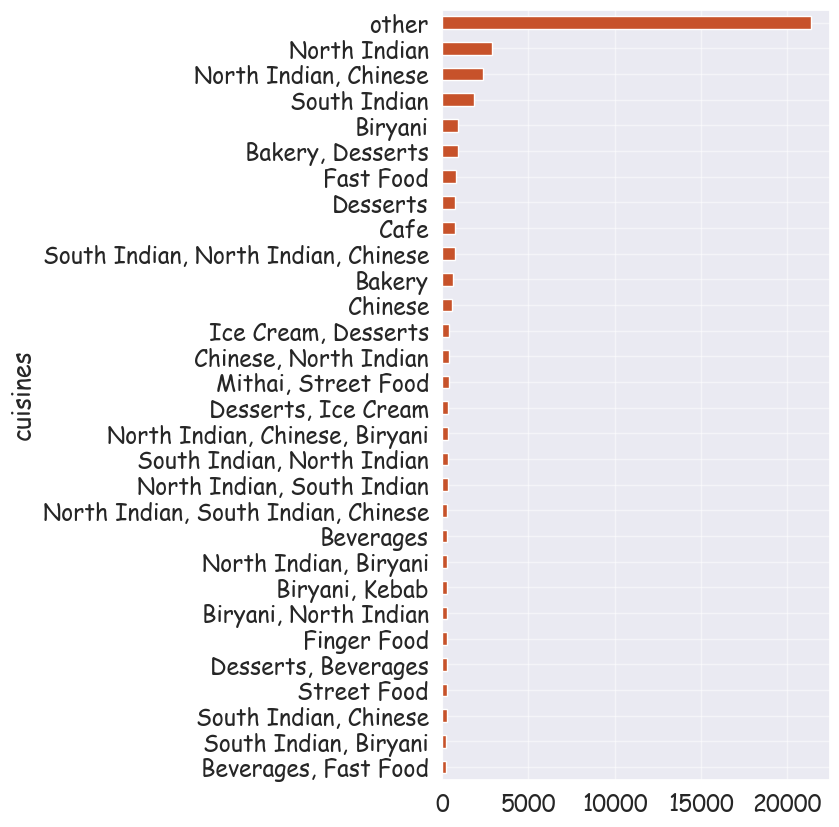

In [49]:
df['cuisines'].value_counts().head(30).plot(kind='barh',figsize=(5,10)).invert_yaxis();

In [50]:
df['cuisines'].describe()

count     51672
unique      141
top       other
freq      21393
Name: cuisines, dtype: object

> approx_cost(for two people)

In [51]:
df.rename({'approx_cost(for two people)': 'cost2people'}, axis=1, inplace=True)

In [52]:
df["cost2people"].describe()

count     51371
unique       70
top         300
freq       7576
Name: cost2people, dtype: object

In [53]:
df["cost2people"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [54]:
### convert cost values to integers
def cost_transformer(cost):
    try:
        return int(cost.replace(',',''))
    except:
        return np.nan
    


df['cost2people'] = df['cost2people'].apply(cost_transformer)

In [55]:
df.describe()

,rate,votes,cost2people
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


## Answer Some Questions

In [58]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost2people,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,other,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",other,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [59]:
df[(df['name'] == 'Vinny\'s') & (df['address'] == '# 31, 7th Cross, Opposite Canara Bank, Domlur, Bangalore') ].drop('url',axis=1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost2people,reviews_list,menu_item,type,city
19010,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1,360,080 41646123\r\n+91 9845846988,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...",other,600.0,"[('Rated 4.0', ""RATED\n Interesting little pl...","['Chicken Lovers Pizza', 'Brownie', '3 Egg Pla...",Dine-out,Indiranagar
33633,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1,366,080 41646123\n+91 9845846988,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...",other,600.0,"[('Rated 4.0', ""RATED\n Interesting little pl...",[],Delivery,Koramangala 6th Block
45500,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1,367,080 41646123\n+91 9845846988,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...",other,600.0,"[('Rated 3.0', 'RATED\n There are better pizz...",[],Delivery,Old Airport Road
45910,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1,366,080 41646123\n+91 9845846988,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...",other,600.0,"[('Rated 3.0', 'RATED\n There are better pizz...",[],Dine-out,Old Airport Road


In [60]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost2people', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [61]:
df.groupby(['address','votes','name'])[['address','votes']].count()

address  \
address                                            votes name                                   
# 31, 7th Cross, Opposite Canara Bank, Domlur, ... 360   Vinny's                            1   
                                                   366   Vinny's                            2   
                                                   367   Vinny's                            1   
# 5AC-418, First Floor,5A Cross,   Second Stage... 0     Supreme Biryani                    2   
# 8 (169) 11th cross S.R Nagar Residency Road, ... 13    Venkateshwara Foods               10   
...                                                                                       ...   
bhaskar reddy building, hosur main road, yellam... 7     Prem's Biriyani                    2   
c/o Foodism, 2nd A Main Road, 445/31, 7th Cross... 44    Artinci Artisanal Ice Cream        2   
hree Shankaranarayana 1981 & 1990/17, 28th Main... 0     SLV Ragigudda                      9   
no 32/8 8th cross, 7th Block Jayanagar, Bangalore  0     Tarbouche                          1   
somasundra palaya                                  31    The Bigman's Cafe                  1   

                                                                                      votes  
address                                            votes name                                
# 31, 7th Cross, Opposite Canara Bank, Domlur, ... 360   Vinny's                          1  
                                                   366   Vinny's                          2  
                                                   367   Vinny's                          1  
# 5AC-418, First Floor,5A Cross,   Second Stage... 0     Supreme Biryani                  2  
# 8 (169) 11th cross S.R Nagar Residency Road, ... 13    Venkateshwara Foods             10  
...                                                                                     ...  
bhaskar reddy building, hosur main road, yellam... 7     Prem's Biriyani                  2  
c/o Foodism, 2nd A Main Road, 445/31, 7th Cross... 44    Artinci Artisanal Ice Cream      2  
hree Shankaranarayana 1981 & 1990/17, 28th Main... 0     SLV Ragigudda                    9  
no 32/8 8th cross, 7th Block Jayanagar, Bangalore  0     Tarbouche                        1  
somasundra palaya                                  31    The Bigman's Cafe                1  

[19497 rows x 2 columns]

-----

#### Online Ordering and Table Booking:

In [105]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other,other,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet,Banashankari


##### What percentage of restaurants offer online orders?

In [121]:
online_order_percentage = floor((df.loc[df['online_order'] == 'Yes', 'online_order'].count()/df['online_order'].count()) * 100)
print(f'Percentage of resturants that provide online orders is {online_order_percentage}% ')

Percentage of resturants that provide online orders is 58% 


##### What percentage of restaurants have the option to book a table?

In [123]:
booking_table_percentage = floor( ( df.loc[df['book_table'] == 'Yes', 'book_table'].count() / df['book_table'].count() ) * 100 )
print(f'percentage of resturants that have booking is {booking_table_percentage}%')

percentage of resturants that have booking is 12%


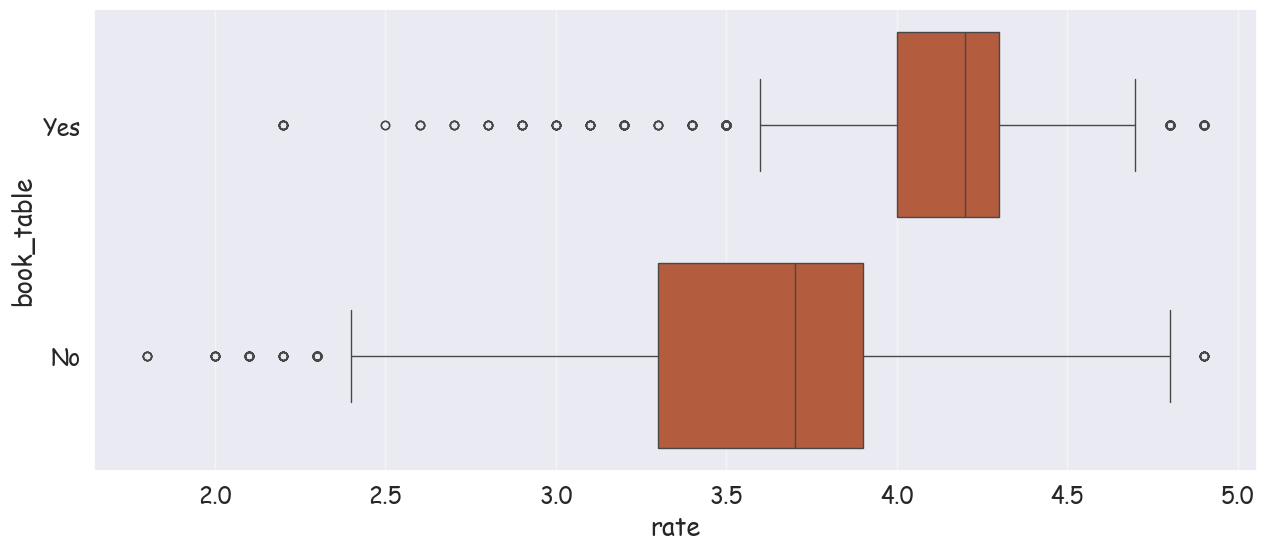

In [124]:
sns.boxplot(x= 'rate', y= 'book_table', data=df);

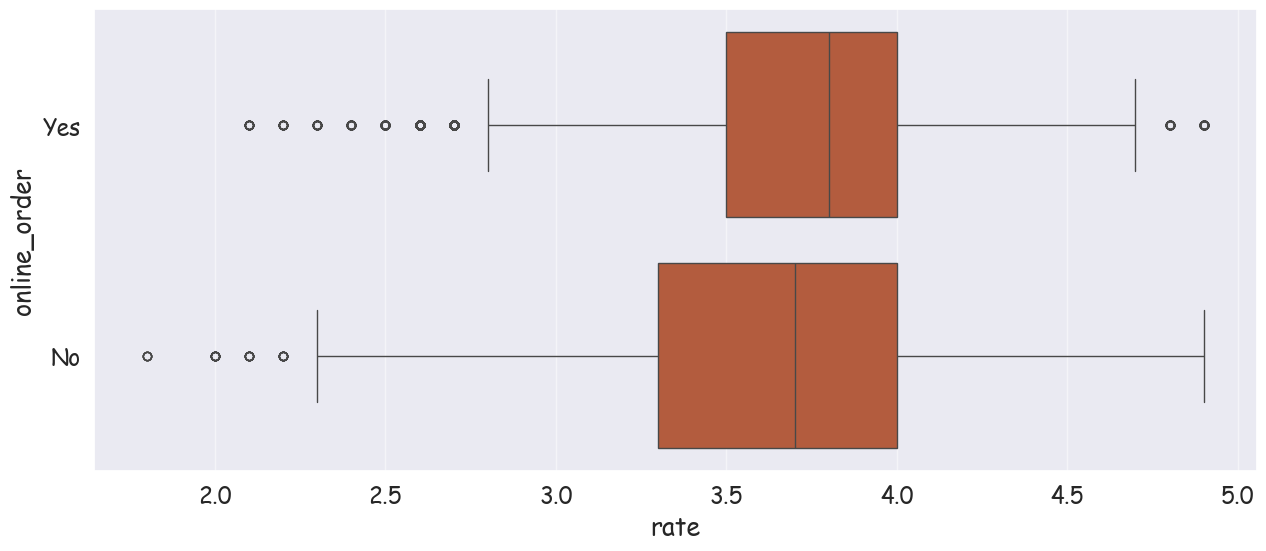

In [125]:
sns.boxplot(x= 'rate', y= 'online_order', data=df);

##### What is the average rating for restaurants in different locations?

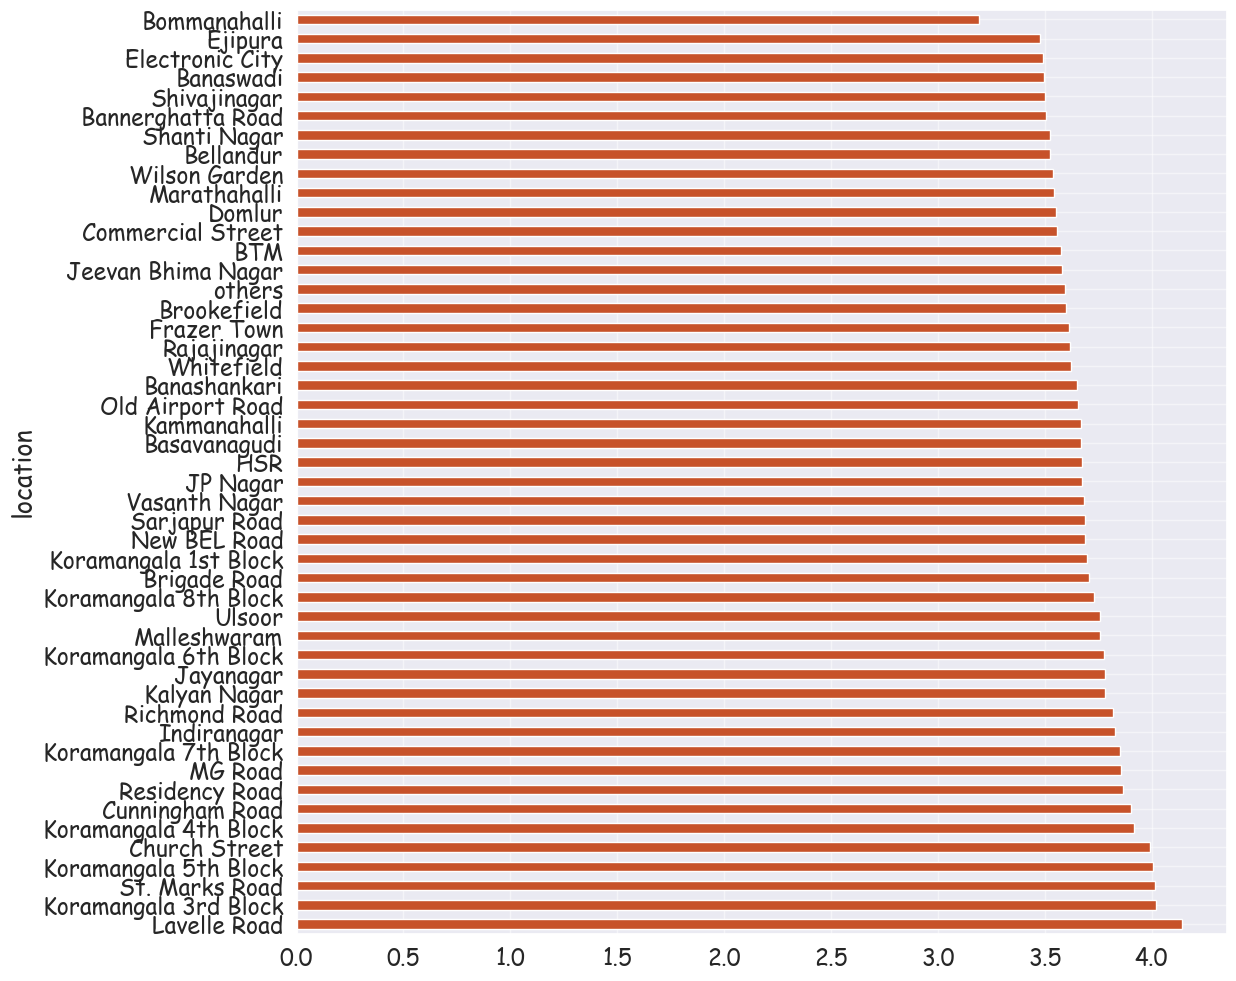

In [143]:
df.groupby('location')['rate'].mean().sort_values(ascending=False).plot.barh(figsize=(12,12));

In [62]:
df.drop(['url', 'address', 'phone', 'reviews_list',
        'menu_item', 'dish_liked'], axis=1, inplace=True)

## Feature Engineering

In [63]:
df2 = df.copy(deep=True)

In [64]:
df2.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other,other,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet,Banashankari


In [65]:
df2.drop('name', axis=1, inplace= True)

In [66]:
numerical= df2.select_dtypes(include= ['integer', 'float'])
categorical= df2.select_dtypes(exclude= ['integer', 'float'])

In [67]:
print(*numerical.columns.to_list(), sep= ', ')
print('*'*20)
print(*categorical.columns.to_list(), sep=', ')

rate, votes, cost2people
********************
online_order, book_table, location, rest_type, cuisines, type, city


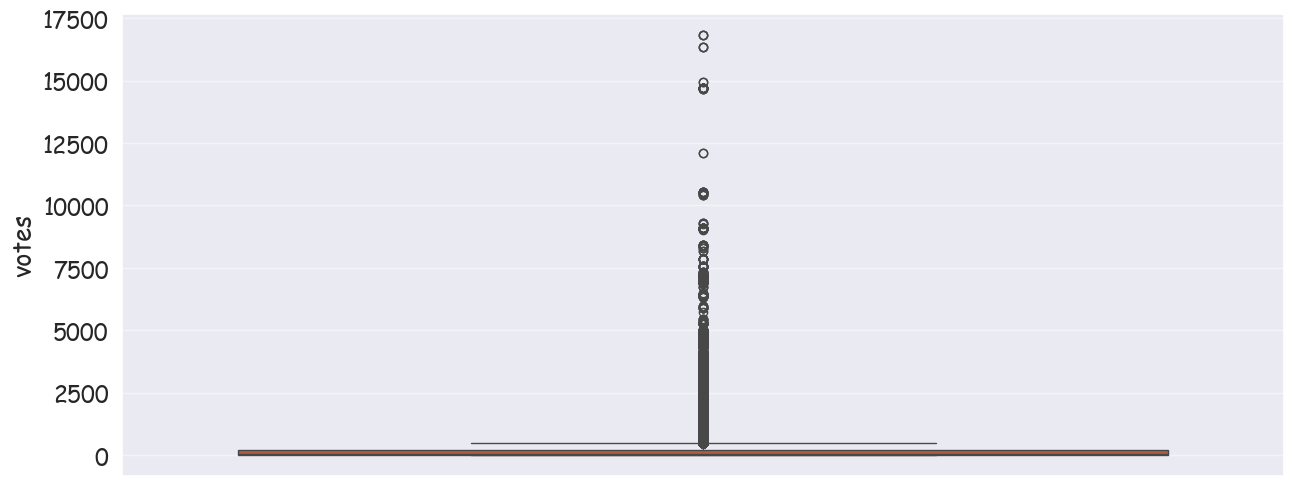

In [68]:
sns.boxplot(df['votes']);

In [69]:
df2.loc[df2['votes'].isna() , 'votes']

Series([], Name: votes, dtype: int64)

In [70]:
df2.isna().sum()

online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
cost2people       346
type                0
city                0
dtype: int64

In [71]:

df2.loc[df2['votes'] == 0 , 'votes'] = np.nan
df2.dropna(inplace = True)




In [72]:
# # Apply Box-Cox transformation only to the 'votes' column
# df2['votes'], _ = boxcox(df2['votes'] + 1)  # Adding 1 to handle zero or negative values if present


# scaler = RobustScaler()

# df2['votes'] = scaler.fit_transform(df2[['votes']])

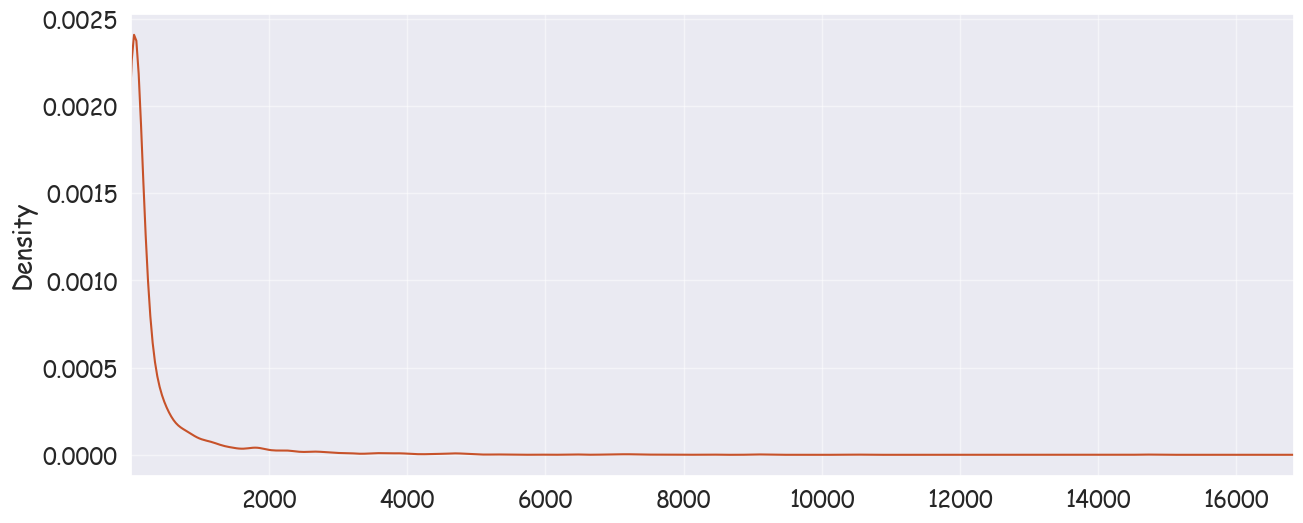

In [73]:
df2['votes'].plot.kde(xlim= (df2['votes'].min(), df2['votes'].max()) );

In [74]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder())
# ])

# # Use ColumnTransformer to apply different transformations to different features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])


In [75]:
df2.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost2people', 'type', 'city'],
      dtype='object')

In [76]:
df['cuisines'].head()

0    North Indian, Mughlai, Chinese
1                             other
2                             other
3        South Indian, North Indian
4                             other
Name: cuisines, dtype: object

In [77]:
# df2['num_cuisines'] = df2['cuisines'].apply(lambda x: len(x.split(',')))
# df2['restaurant_density'] = df2.groupby('location')['location'].transform('count') / df2['location'].nunique()


In [78]:
# df2.drop(['location', 'cuisines'], axis=1, inplace=True)

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41244 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41244 non-null  object 
 1   book_table    41244 non-null  object 
 2   rate          41244 non-null  float64
 3   votes         41244 non-null  float64
 4   location      41244 non-null  object 
 5   rest_type     41244 non-null  object 
 6   cuisines      41244 non-null  object 
 7   cost2people   41244 non-null  float64
 8   type          41244 non-null  object 
 9   city          41244 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


# Model

In [79]:
df3 = df2.copy(deep=True)

In [80]:
df3

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,city
0,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787.0,Banashankari,Casual Dining,other,800.0,Buffet,Banashankari
2,Yes,No,3.8,918.0,Banashankari,other,other,800.0,Buffet,Banashankari
3,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166.0,Basavanagudi,Casual Dining,other,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,3.7,34.0,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield
51711,No,No,2.5,81.0,Whitefield,"Casual Dining, Bar",other,800.0,Pubs and bars,Whitefield
51712,No,No,3.6,27.0,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,236.0,others,Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [81]:

df3.loc[df3['rate'] < 3.75, 'rate'] = 0
df3.loc[df3['rate'] >= 3.75, 'rate'] = 1
df3['rate'] = df3['rate'].astype('int')


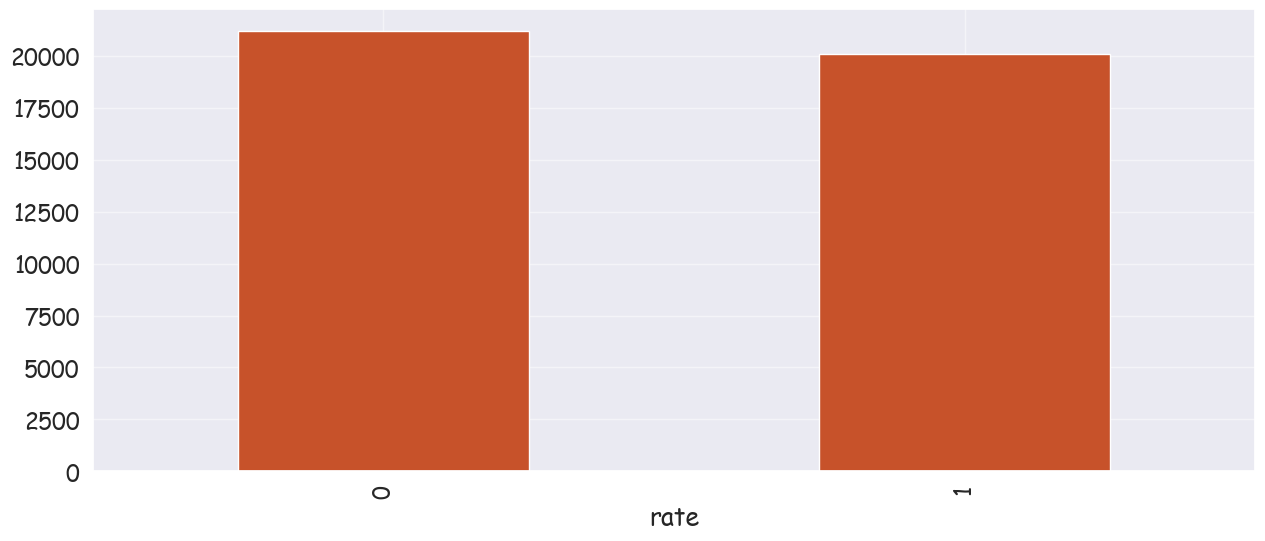

In [82]:
df3['rate'].value_counts().plot.bar();

In [83]:
### remove votes column because any new restoraun dont have votes
df3.drop(columns='votes', axis=1, inplace= True)

In [158]:
df3[df3['rate'] == 0]

,online_order,book_table,rate,location,rest_type,cuisines,cost2people,type,city
3,No,No,0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
6,No,No,0,others,Casual Dining,other,800.0,Buffet,Banashankari
19,Yes,No,0,Banashankari,Cafe,other,400.0,Cafes,Banashankari
20,Yes,No,0,Banashankari,Cafe,other,400.0,Cafes,Banashankari
21,Yes,No,0,Banashankari,Cafe,other,500.0,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...
51708,No,No,0,Whitefield,"Casual Dining, Bar",other,1200.0,Pubs and bars,Whitefield
51709,No,No,0,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield
51711,No,No,0,Whitefield,"Casual Dining, Bar",other,800.0,Pubs and bars,Whitefield
51712,No,No,0,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield


In [84]:
numerical_features = df3.select_dtypes(include= ['integer', 'float']).columns.to_list()
categorical_features = df3.select_dtypes(exclude= ['integer', 'float']).columns.to_list()
numerical_features.remove('rate')

In [85]:
x= df3.drop('rate', axis=1)
y = df3['rate']

In [86]:
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
# from xgboost import XGBClassifier

In [88]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




models = [
    ("LR", LogisticRegression()),
    ("Decision_Tree", DecisionTreeClassifier(criterion="entropy", max_depth=14)),
    ("Random_Forest", RandomForestClassifier(n_estimators=5, random_state=42)),
    ("Gradient_Boosting", GradientBoostingClassifier(n_estimators=5, random_state=42)),
    # ("SVM", SVC(kernel='rbf', C=1, gamma='scale', probability=True)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Naive_Bayes", GaussianNB()),
    # ("XGBoost", XGBClassifier(n_estimators=5, random_state=42))
]




In [89]:
for model in models:
    steps = [
        ('preprocessor', preprocessor),
        ('model', model[1])
    ]
    pipeline = Pipeline(steps=steps)
    
    # Use StratifiedKFold to ensure class balance in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Fit the entire pipeline
    pipeline.fit(x_resampled, y_resampled)
    
    # Now, you can use the pipeline for cross-validation and predictions
    scores = cross_validate(pipeline, x, y, cv=cv, scoring='f1', return_train_score=True, error_score='raise')
    
    train_recall = scores["train_score"].mean()
    test_recall = scores["test_score"].mean()

    print(model[0])
    print("Train recall:", train_recall)
    
    # Check if test_recall is nan and handle it accordingly
    if not np.isnan(test_recall):
        print("Test recall:", test_recall)
    else:
        print("Test recall is nan. Check for class imbalance or adjust scoring metric.")
    
    print('-' * 25)


LR
Train recall: 0.6055421013469949
Test recall: 0.6050989466535547
-------------------------


Decision_Tree
Train recall: 0.8436594803783384
Test recall: 0.8061662238332369
-------------------------
Random_Forest
Train recall: 0.9445750182092262
Test recall: 0.797448717232171
-------------------------
Gradient_Boosting
Train recall: 0.5897765744939364
Test recall: 0.5890778801915351
-------------------------
KNN
Train recall: 0.8210009099261649
Test recall: 0.7153592147353984
-------------------------
Naive_Bayes
Train recall: 0.5062087105040828
Test recall: 0.5063220930949692
-------------------------


### Tree

In [90]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))  # You can adjust other hyperparameters here
])

# Define the parameter grid for the Decision Tree
dt_param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [5, 10, 15, 20],  # Adjust the range as needed
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold to ensure class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=cv, scoring='recall', return_train_score=True)

# Fit the grid search to find the best hyperparameters
grid_search.fit(x, y)

# Get the best Decision Tree model from the grid search
best_dt_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:")
print(grid_search.best_params_)


Best Hyperparameters for Decision Tree:
{'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


--------

### Ensample with Tree Base

In [92]:
from imblearn.ensemble import BalancedBaggingClassifier


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

ensemble_model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(criterion= 'gini', max_depth= 15, min_samples_leaf= 1, min_samples_split= 2), random_state=42)



steps = [
    ('preprocessor', preprocessor),
    ('model', ensemble_model)
]

pipeline = Pipeline(steps=steps)

# Use StratifiedKFold to ensure class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for n_estimators
param_grid = {
    'model__n_estimators': [5, 10, 20, 30, 50, 70, 100]  # Adjust the values as needed
}

# Create the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', return_train_score=True, error_score='raise')

# Fit the grid search to the data
grid_search.fit(x_resampled, y_resampled)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

# Retrieve and print the performance on the test and train sets
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
print("Test F1 Scores: ", test_scores)
print("Train F1 Scores: ", train_scores)



Best Parameters:  {'model__n_estimators': 70}
Best F1 Score:  0.8759740022748428
Test F1 Scores:  [0.85712923 0.86737817 0.87276237 0.87351808 0.87526553 0.875974
 0.87573781]
Train F1 Scores:  [0.91269542 0.92310963 0.92767322 0.92880083 0.93050701 0.93089666
 0.9311151 ]


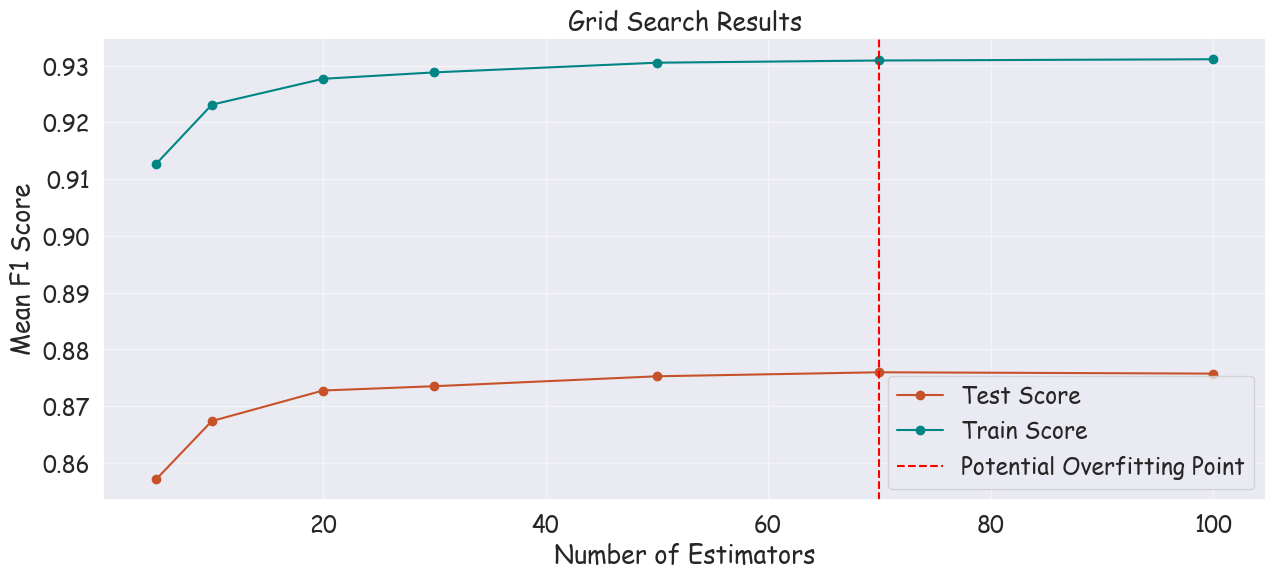

In [93]:
# Identify the index where overfitting might occur (customize as needed)
overfitting_index = -2

plt.plot(param_grid['model__n_estimators'], test_scores, marker='o', label='Test Score')
plt.plot(param_grid['model__n_estimators'], train_scores, marker='o', label='Train Score')
plt.axvline(x=param_grid['model__n_estimators'][overfitting_index], color='r', linestyle='--', label='Potential Overfitting Point')
plt.title('Grid Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cost2people']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['online_order', 'book_table',
                                                   'location', 'rest_type',
                                                   'cuisines', 'type',
                                                   'city'])])),
                ('model',
                 BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                                           n_estimators=70, random_state=42))])

In [95]:
Model = grid_search.best_estimator_

In [96]:
joblib.dump(Model, "ensample_tree_model.h5")

['ensample_tree_model.h5']

--------